## Association Rules - Python
### - _Ankur Patel_

### Introduction:

Association rule mining is a technique to identify underlying relations between different items. An association rule has two parts: an Antecedent (if) and a Consequent (then). There are three major components of Apriori algorithm: Support,
Confidence, and Lift. In this data set, Churn will be only consequent while others can be either. 

The Churn data set will be used to predict Churn depending on VMail Plan, Intl Plan, and CustServ CallsSet (which will be set ordinal). 

### Preprocessing:

In [2]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# pip install apyori   
# Apyori is a simple implementation of Apriori algorithm
from apyori import apriori  

# from mlxtend.frequent_patterns import association_rules    #another possible option

In [23]:
# read churn dataset
df = pd.read_csv("churn.txt")
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [24]:
# subset of 3 mentioned predictors and churn
predictors = ["VMail Plan","Int'l Plan","CustServ Calls","Churn?"]
df = df[predictors]
df.head()

,VMail Plan,Int'l Plan,CustServ Calls,Churn?
0,yes,no,1,False.
1,yes,no,1,False.
2,no,no,0,False.
3,no,yes,2,False.
4,no,yes,3,False.


In [21]:
print("Length:", len(df))
print("\nNull values:")
print(df.isnull().sum())

Length: 3333

Null values:
VMail Plan        0
Int'l Plan        0
CustServ Calls    0
Churn?            0
dtype: int64


In [50]:
# don't need to set CustServ Calls to be ordinal
print("CustServ Calls:\n", df["CustServ Calls"].unique())
list(df["CustServ Calls"]).sort(key=float) 

CustServ Calls:
 [1 0 2 3 4 5 7 9 6 8]


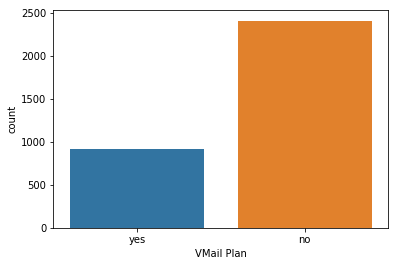

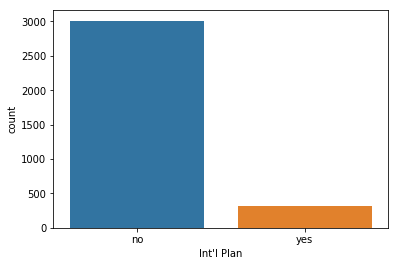

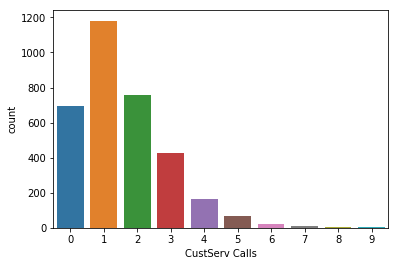

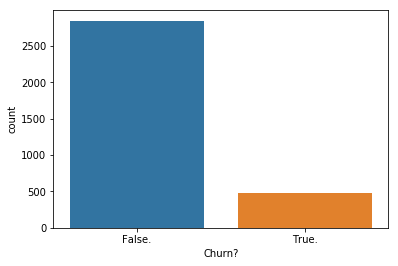

In [7]:
# countplot of each variable
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df)

In [8]:
# Churn? False/True percent
false = df[df["Churn?"]=="False."]["Churn?"].count()
true = df[df["Churn?"]=="True."]["Churn?"].count()
print("False Churns:", false, "... ", round((false/df["Churn?"].count())*100, 1), "%")
print("True Churns:", true, "... ", round((true/df["Churn?"].count())*100, 1), "%")

False Churns: 2850 ...  85.5 %
True Churns: 483 ...  14.5 %


### Review:

- 3333 x 21 churn data set was sliced to 3333 x 4
- 3 predictors (VMail Plan, Intl Plan, and CustServ CallsSet) and 1 target (Churn)
- No Null values
- There are ~85% False and ~14% True Churns

### Find the association rule with the greatest lift.
### Report the following for the rule: Number of instances, Support %, Confidence %, Lift.

- minimum antecedent support - 1%
- minimum rule confidence - 5%
- maximum number of antecedents to 1



In [9]:
# list of lists of transactions
rec = []
for i in range(3333):
    rec.append([str(df.values[i,j]) for j in range(0, 4)])

In [46]:
# apply the Apriori algorithm with the above parameters
# minlen=2 and maxlen=2 specifies that we want antecedents with exactly 1
association_rules = apriori(rec, min_support=0.01, min_confidence=0.05, max_len=2, min_lift=2)
association_results = list(association_rules)

In [47]:
print("Rules:", len(association_results))
print("\nFirst Association Rule's Result:\n", association_results[0])

Rules: 4

First Association Rule's Result:
 RelationRecord(items=frozenset({'4', 'True.'}), support=0.022802280228022803, ordered_statistics=[OrderedStatistic(items_base=frozenset({'4'}), items_add=frozenset({'True.'}), confidence=0.4578313253012048, lift=3.1593205118611087), OrderedStatistic(items_base=frozenset({'True.'}), items_add=frozenset({'4'}), confidence=0.15734989648033126, lift=3.1593205118611087)])


#### Support - popularity of item 
Support(I) = (Transactions containing (I))/(Total Transactions)

#### Confidence - popularity of item being bought if another item bought
Confidence(I→J) = (Transactions containing both (I and J))/(Transactions containing I)

#### Lift - ratio of sale of J when I is sold
Lift(I→J) = (Confidence (I→J))/(Support (J))


In [49]:
for item in association_results:

    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    # next index of support
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: 4 -> True.
Support: 0.022802280228022803
Confidence: 0.4578313253012048
Lift: 3.1593205118611087
Rule: True. -> 5
Support: 0.012001200120012
Confidence: 0.606060606060606
Lift: 4.182194616977225
Rule: 4 -> True.
Support: 0.0222022202220222
Confidence: 0.4625
Lift: 3.1915372670807454
Rule: True. -> 5
Support: 0.0111011101110111
Confidence: 0.5873015873015872
Lift: 4.052745735975549


### Conclusion:
The Association Rule with the greatest Lift was second result of Rule {True -> 5}. It had a Lift of 4.18, which was the ratio of getting 5 CustServ Calls when Churn is True. It also had the highest Confidence of 60.6%, which was the popularity of both of those two happening. The Support of 1.2% makes sense since Churn should be less likely.